# **FinRisk AI: Quantitative Risk Modeling & Anomaly Detection on B3**

**🛡️ FinData Risk Pro: Gestão de Risco e Detecção de Anomalias**

<p align="justify">
Este projeto implementa um motor de análise quantitativa para carteiras de ações da B3. Através da Simulação de Monte Carlo, estimamos o risco de perda (VaR e CVaR) considerando a correlação entre ativos. Complementarmente, utilizamos o algoritmo de Machine Learning Isolation Forest para identificar comportamentos anômalos em ativos específicos, unindo a estatística clássica à inteligência artificial.

**🛡️ FinData Risk Pro: Risk Management & Anomaly Detection**

<p align="justify">
This project implements a quantitative analysis engine for B3 stock portfolios. Through Monte Carlo Simulation, we estimate the risk of loss (VaR and CVaR) by accounting for asset correlations. Additionally, we employ the Isolation Forest machine learning algorithm to identify anomalous behaviors in specific assets, merging classical statistics with artificial intelligence.

**1. Setup e Importações (Setup & Imports)**

In [1]:
# Importação de bibliotecas para computação científica e finanças
# Importing libraries for scientific computing and finance

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import yfinance as yf

from scipy.stats import norm
from sklearn.ensemble import IsolationForest

In [2]:
# Configuração estética para os gráficos (Seaborn)
# Aesthetic configuration for plots (Seaborn)

sns.set_theme(style="darkgrid")

**2. Configuração e Coleta (Config & Data Ingestion)**

In [3]:
# Definição dos parâmetros: ativos, período e capital
# Setting parameters: assets, timeframe, and capital

tickers = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'ABEV3.SA']
data_inicio = "2023-01-01"
data_fim = "2026-01-20"
investimento_total = 100000

# Download dos dados de fechamento via Yahoo Finance
# Downloading closing prices via Yahoo Finance
print(f"Baixando dados para: {tickers}...")
df = yf.download(tickers, start=data_inicio, end=data_fim)['Close']

Baixando dados para: ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'ABEV3.SA']...


/tmp/ipython-input-1777062334.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start=data_inicio, end=data_fim)['Close']
[*********************100%***********************]  5 of 5 completed


In [4]:
# Cálculo dos Log-Retornos para normalização estatística
# Calculating Log-Returns for statistical normalization

returns = np.log(df / df.shift(1)).dropna()

**3. Simulação de Monte Carlo (Risk Engine)**

In [5]:
def calcular_monte_carlo_var(returns, investimento_total=100000, simulacoes=10000):
    """
    Estima o VaR e CVaR via Simulação de Monte Carlo.
    Estimates VaR and CVaR via Monte Carlo Simulation.
    """
    media_retornos = returns.mean()
    cov_matrix = returns.cov()

    # Decomposição de Cholesky para manter as correlações históricas entre ativos
    # Cholesky Decomposition to maintain historical correlations between assets
    L = np.linalg.cholesky(cov_matrix)

    # Geração de caminhos aleatórios (Ruído Branco)
    # Generating random paths (White Noise)
    z = np.random.normal(size=(simulacoes, len(tickers)))
    retornos_simulados = media_retornos.values + np.dot(z, L.T)

    # Cálculo do retorno da carteira (Equiponderada)
    # Portfolio return calculation (Equally weighted)
    pesos = np.array([1/len(tickers)] * len(tickers))
    retornos_carteira = np.dot(retornos_simulados, pesos)

    # Cálculo das métricas de risco (Percentil 5%)
    # Risk metrics calculation (5th Percentile)
    var_95 = np.percentile(retornos_carteira, 5)
    cvar_95 = retornos_carteira[retornos_carteira <= var_95].mean()

    return var_95, cvar_95, retornos_carteira

# Execução da simulação
# Running the simulation
var_95, cvar_95, sim_results = calcular_monte_carlo_var(returns, investimento_total)

**4. Detecção de Anomalias (Anomaly Detection)**

In [6]:
# Input interativo para seleção de ativo para auditoria
# Interactive input for selecting an asset for auditing

print(f"\nAtivos disponíveis: {tickers}")
selecao = input("Analise anomalias em (ex: PETR4): ").strip().upper()
asset_to_analyze = selecao if ".SA" in selecao else f"{selecao}.SA"

if asset_to_analyze in returns.columns:
    asset_data = returns[[asset_to_analyze]].copy()

    # Inicialização do Isolation Forest (IA Não Supervisionada)
    # Isolation Forest initialization (Unsupervised ML)

    # Contamination=0.03 define que esperamos 3% de outliers
    # Contamination=0.03 defines we expect 3% outliers

    iso_forest = IsolationForest(contamination=0.03, random_state=42)
    asset_data['anomaly'] = iso_forest.fit_predict(asset_data)

    # Filtragem dos pontos identificados como anômalos (-1)
    # Filtering points identified as anomalous (-1)

    anomalias = asset_data[asset_data['anomaly'] == -1]


Ativos disponíveis: ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'ABEV3.SA']
Analise anomalias em (ex: PETR4): VALE3


**5. Visualização e Relatório (Visualization & Final Report)**

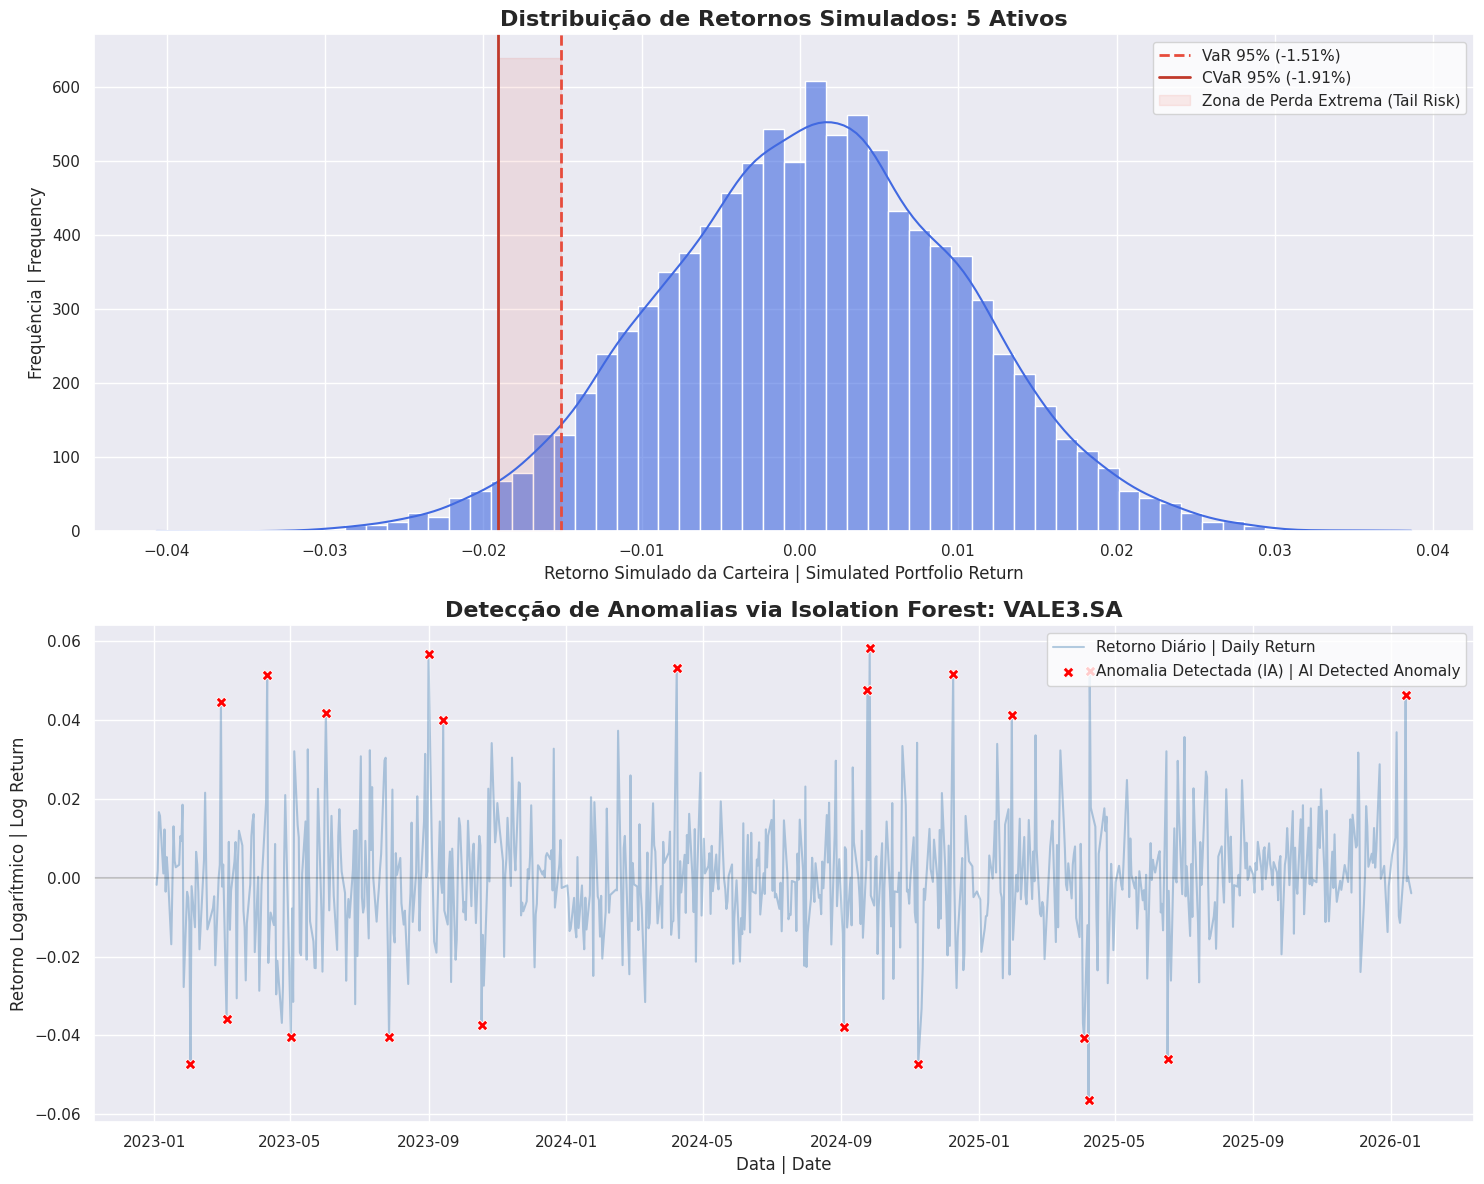

In [7]:
# --- 5. VISUALIZAÇÃO DOS RESULTADOS (VERSÃO PREMIUM) ---
# --- 5. RESULTS VISUALIZATION (PREMIUM VERSION) ---

# Configuração da figura com dois subplots
# Figure configuration with two subplots
plt.figure(figsize=(15, 12))

# Subplot 1: Histograma e Densidade do Risco (Monte Carlo)
# Subplot 1: Risk Distribution and Density (Monte Carlo)
plt.subplot(2, 1, 1)
sns.histplot(sim_results, bins=60, kde=True, color='royalblue', edgecolor='white', alpha=0.6)

# Adicionando linhas verticais para VaR e CVaR (Métricas de Risco)
# Adding vertical lines for VaR and CVaR (Risk Metrics)
plt.axvline(var_95, color='#e74c3c', linestyle='--', linewidth=2, label=f'VaR 95% ({var_95:.2%})')
plt.axvline(cvar_95, color='#c0392b', linestyle='-', linewidth=2, label=f'CVaR 95% ({cvar_95:.2%})')

# Realce visual da "Cauda de Risco"
# Visual highlight of the "Risk Tail"
plt.fill_betweenx(plt.ylim(), cvar_95, var_95, color='#e74c3c', alpha=0.1, label='Zona de Perda Extrema (Tail Risk)')

plt.title(f"Distribuição de Retornos Simulados: {len(tickers)} Ativos", fontsize=16, fontweight='bold')
plt.xlabel("Retorno Simulado da Carteira | Simulated Portfolio Return", fontsize=12)
plt.ylabel("Frequência | Frequency", fontsize=12)
plt.legend(frameon=True, facecolor='white')

# Subplot 2: Série Temporal e Anomalias Detectadas pela IA
# Subplot 2: Time Series and AI-Detected Anomalies
plt.subplot(2, 1, 2)
sns.lineplot(x=returns.index, y=returns[asset_to_analyze], color='steelblue', alpha=0.4, label='Retorno Diário | Daily Return')

# Plotagem das anomalias com marcador de destaque (X vermelho)
# Plotting anomalies with a highlight marker (Red X)
sns.scatterplot(x=anomalias.index, y=anomalias[asset_to_analyze], color='red', s=60,
                label='Anomalia Detectada (IA) | AI Detected Anomaly', marker='X', zorder=5)

plt.title(f"Detecção de Anomalias via Isolation Forest: {asset_to_analyze}", fontsize=16, fontweight='bold')
plt.xlabel("Data | Date", fontsize=12)
plt.ylabel("Retorno Logarítmico | Log Return", fontsize=12)
plt.axhline(0, color='black', linestyle='-', alpha=0.2)
plt.legend(frameon=True, facecolor='white')

plt.tight_layout()
plt.show()

In [8]:
# --- RELATÓRIO EXECUTIVO FINAL ---
# --- FINAL EXECUTIVE REPORT ---

print("\n" + "="*50)
print("📊 RELATÓRIO FINAL DE RISCO | FINAL RISK REPORT")
print("="*50)
print(f"Investimento Base | Base Investment: R$ {investimento_total:,.2f}")
print(f"VaR 95% (Risco Máximo Diário): R$ {abs(var_95 * investimento_total):,.2f}")
print(f"CVaR 95% (Expectativa em Crise): R$ {abs(cvar_95 * investimento_total):,.2f}")
print(f"Anomalias no Ativo {asset_to_analyze}: {len(anomalias)} pontos")
print("="*50)


📊 RELATÓRIO FINAL DE RISCO | FINAL RISK REPORT
Investimento Base | Base Investment: R$ 100,000.00
VaR 95% (Risco Máximo Diário): R$ 1,507.94
CVaR 95% (Expectativa em Crise): R$ 1,905.25
Anomalias no Ativo VALE3.SA: 22 pontos


# **Considerações Finais (The Wrap-up)**

<p align="justify">
A união dessas métricas permite uma tomada de decisão baseada em evidências estatísticas, eliminando o viés emocional. Enquanto a Simulação de Monte Carlo prepara o investidor para a volatilidade matemática do portfólio, a Detecção de Anomalias via IA atua como um sistema de radar para eventos fora do radar comum. Ter este relatório em mãos significa transitar de um "apostador" para um "gestor de riscos".

<p align="justify">
The combination of these metrics enables evidence-based decision-making, eliminating emotional bias. While Monte Carlo Simulation prepares the investor for the portfolio's mathematical volatility, AI-driven Anomaly Detection acts as a radar system for events outside the norm. Holding this report means transitioning from a "gambler" to a "risk manager."
